# A STATISTICAL ANALYSIS REPORT FOR THE UNITED STATES DEPARTMENT OF AGRICULTURE FOOD ACCESS RESEARCH ATLAS




# 1. Background

The USDA's Food Access Research Atlas  aims to address the complex interactions between various food environment factors, including nearness to food stores or a market, food prices and food and nutrition assistance. By putting together statistics on these indicators, the Atlas aims to promote more research on the determinants of food choices and diet quality. The atlas further seeks to provide an extensive spatial overview of US residents' access to healthy food. In this analytical report different parameters of the the USDA 2006 Food Access Research Atlas data are assesed.

The purpose of this report is to provide valuable acumen into the number of people and households, particularly those low-income individuals, who face challenges in accessing essential sources of nutritious food in the United States. By scrutinising various measurements such as the percentage of total population that is low-income and has low access to a supermarket or large grocery store, number of households without a vehicle with low access to a supermarket or large grocery store, and the age-specific parameters on children and the retired (65+), the aim of this report is to establish a thourough understanding of the state of food access across the United States.

Throughout this report, we inspect key metrics including the number of people with low access to nutritious food and the coinciding percentage of the population in question. Additionally, we explore the specific synopsis of low-income individuals, exploring the relationships between parameters and the extent of their effect on each other. Furthermore, we examine the number of households without a vehicle by analyzing the percentage of these that face challenges to acess food stores.

In terms of deep analysis of the data, we assess data on different age groups, namely children aged 0-17 and individuals aged 65 and above, analysing both the percentage and the number of people within these categories who have a low access to supermarkets or large grocery stores. By taking into account these diverse dimensions, we aim to gain valuable insights into the specific challenges faced by different classes of the population and develop more targeted strategies to address their needs.

This report aims to achieve the following objectives by exploring the USDA 2006 Food Access Research Atlas data.

1. To determine the correlation between people's income and the availability of healthy food sources in a neighborhood.
2. To determine how the percentage of housing units without a vehicle with low access to a supermarket or large grocery store, the percentage of children age 0-17 with low access to a grocerly store, and the percentage of people age 65+ with low access relate to the overall percentage of people with low access to a supermarket or large grocery store.
3. To identify counties with the highest need for intervention and policy measures based on their characteristics and food accessibility levels.

In order to evaluate the performance of a statistical learning method on
a given data set, we need some way to measure how well its predictions
actually match the observed data (James et al., 2023). By fitting various statical learning methods, this analysis aims at establishing  which statical methods are suitable to answer and address the questions above which are typically the objectives of this analysis. This statistical analysis report seeks to be a valuable resource for policymakers, researchers, and stakeholders working towards improving food access across the United States. By giving insights into the supermarket and grocery store accessibility, this report aims to contribute to fact based governance and the development of appropriate interventions to ensure food security and promote equitable access to nutritious food for all.

With these findings presented herein the hope is that this shall be used to support United States Department of Agriculture's efforts in advancing food access research and inform strategic initiatives aimed at improving food accessibility for the American population.



# 2. Methods and Results

This section gives clear and precise methodological approaches and step by step procedures for the statistical analysis on Food Access Research Atlas Data by the USDA. Code is fully commented and can run in Google Colab without modification.

# I. Data sourcing and description:

The data used in this analysis is sourced from www.data.gov which is the official and open data repository for the US Government. The data was downloaded from the following direct link. https://www.ers.usda.gov/data-products/food-access-research-atlas/download-the-data/.
According to the USDA data catalogue this tabular data which is in excel fomart contains data on the The Food Access Research Atlas which provides information at the census-tract level; the smallest geographic level of data in the Food Environment Atlas is the county.

# II. Importing Libraries:
Here important libraries were imported. These are necessary Python libraries for data analysis, such as Pandas, NumPy, and Matplotlib. The first step that must be taken to design a profit prediction system with Python is first to prepare libraries  and research  data  in the appropriate format (Pamungkas, Sadalia and Muda, 2023).

In [33]:
# we imported Pandas as below for analyzing, cleaning, exploring, and manipulating data.
import pandas as pd

In [34]:
# to be able to perform a wide variety of mathematical operations on arrays we imported numpy as below.
import numpy as np

In [35]:
# we imported matplotlib as below which is our main data visulisation library
import matplotlib as mpl

In [36]:
# import matplotlib for visualisation
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
!pip install geopandas

# III. Importing and Preprocessing Data:

The data set was uploaded to a Git hub repository after it was sourced, here the data was imported from the Git hub repository using the git clone command which is used to create a local copy of a repository from a remote source. In this case, the repository will be cloned into the current directory where the command is executed.

By running this command, the files and folders will be downloaded from the specified GitHub repository into colab, allowing us access to work with the repository's contents locally.

According to Chupilko et al., (2014) the approach to data processing depends, first of all, on its type,
purpose of use, capabilities of the enterprise or institution in the organization of data collection,
systematization, analysis, which are often limited. The quality of data plays a significant role in enhancing the accuracy of analysis results (Teimourzadeh, Kakavand, Kakavand, 2022).

In order to preprocess the data, the collected data was cleaned by removing any duplicates, missing values, or outliers that could skew the results. The variables were standardized to ensure comparability across different datasets.



In [38]:
# Clone the 'Statistical_Analysis_For_Data_Science' GitHub repository
!git clone https://github.com/WilliamBanda/Statistical_Analysis_For_Data_Science.git

fatal: destination path 'Statistical_Analysis_For_Data_Science' already exists and is not an empty directory.


In [39]:
# Read and display the first few rows of an Excel file using pandas
read= pd.read_excel('Statistical_Analysis_For_Data_Science/FoodDesertLocatorData2006(1).xlsx')
print(read.head())


  State CountyName  Tract_FIPS Urban  TOTALPOP  PERCENT_LOWA_Pop  LOWA_POP  \
0    AL    Autauga  1001020200   Yes      1892              43.9       830   
1    AL    Autauga  1001021100    No      2982              59.2      1766   
2    AL    Baldwin  1003010600   Yes      3724              44.2      1645   
3    AL    Barbour  1005950200    No      4342              11.9       515   
4    AL    Barbour  1005950400    No      4068              28.2      1147   

   PERCENT_LOWI  LOWI  PERCENT_HUNV  HUNV  PERCENT_KIDS  KIDS  \
0          10.0   191           3.5    24          14.0   265   
1          12.7   380           6.6    75          16.8   502   
2          10.3   382           4.8    62          14.8   552   
3           2.7    81           2.3    28           3.7   159   
4           9.5   272           5.8    68           6.9   282   

   PERCENT_SENIORS  SENIORS  
0              4.7       89  
1              7.0      210  
2              4.5      167  
3              2.0  

The next step was to preprocess the data, specifically cleaning the collected data by removing any duplicates, unwanted columns, missing values, or outliers that could skew the results. For instance we removed the Federal Information Processing (FIPS) Tract Identifier (Tract_FIPS) column which wasnt needed in the next analytical stages.



In [40]:
# Read Excel file and assign data to df DataFrame
df = pd.read_excel('Statistical_Analysis_For_Data_Science/FoodDesertLocatorData2006(1).xlsx')

# Display the first few rows of the DataFrame
print(df.head())

# Deleting a specific column
df.drop('Tract_FIPS', axis=1, inplace=True)

# Check for missing values
print(df.isnull())

# Drop rows with missing values
df.dropna()

# Check for duplicate rows
print(df.duplicated())

# Drop duplicate rows
df.drop_duplicates()



  State CountyName  Tract_FIPS Urban  TOTALPOP  PERCENT_LOWA_Pop  LOWA_POP  \
0    AL    Autauga  1001020200   Yes      1892              43.9       830   
1    AL    Autauga  1001021100    No      2982              59.2      1766   
2    AL    Baldwin  1003010600   Yes      3724              44.2      1645   
3    AL    Barbour  1005950200    No      4342              11.9       515   
4    AL    Barbour  1005950400    No      4068              28.2      1147   

   PERCENT_LOWI  LOWI  PERCENT_HUNV  HUNV  PERCENT_KIDS  KIDS  \
0          10.0   191           3.5    24          14.0   265   
1          12.7   380           6.6    75          16.8   502   
2          10.3   382           4.8    62          14.8   552   
3           2.7    81           2.3    28           3.7   159   
4           9.5   272           5.8    68           6.9   282   

   PERCENT_SENIORS  SENIORS  
0              4.7       89  
1              7.0      210  
2              4.5      167  
3              2.0  

,State,CountyName,Urban,TOTALPOP,PERCENT_LOWA_Pop,LOWA_POP,PERCENT_LOWI,LOWI,PERCENT_HUNV,HUNV,PERCENT_KIDS,KIDS,PERCENT_SENIORS,SENIORS
0,AL,Autauga,Yes,1892,43.9,830,10.0,191,3.5,24,14.0,265,4.7,89
1,AL,Autauga,No,2982,59.2,1766,12.7,380,6.6,75,16.8,502,7.0,210
2,AL,Baldwin,Yes,3724,44.2,1645,10.3,382,4.8,62,14.8,552,4.5,167
3,AL,Barbour,No,4342,11.9,515,2.7,81,2.3,28,3.7,159,2.0,85
4,AL,Barbour,No,4068,28.2,1147,9.5,272,5.8,68,6.9,282,4.7,193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6524,WY,Goshen,No,2900,59.4,1721,10.7,297,0.4,5,15.0,436,7.9,230
6525,WY,Laramie,Yes,3810,82.3,3134,13.1,494,8.6,138,22.8,868,8.4,320
6526,WY,Laramie,Yes,4440,61.5,2733,1.5,34,1.2,7,14.2,631,0.0,1
6527,WY,Natrona,Yes,3692,70.3,2594,21.6,783,12.2,218,17.1,632,13.0,480


# VI Exploratory Data Analysis:

Here we conducted descriptive analysis of the variables to gain insights into the distribution, central tendency, and variability. Also summary statistics and visualizations (e.g., histograms, box plots, scatterplots) were used to explore the relationships between variables like Percentage of people with low access to a supermarket or large grocery store, Percentage of households without a vehicle with low access to a supermarket or large grocery store and Percentage of children age 0-17 with low access to a supermarket or large grocery store and also to identify any patterns, trends, or outliers that may require further investigation.

In [41]:
# Read Excel file and assign data to df DataFrame
df = pd.read_excel('Statistical_Analysis_For_Data_Science/FoodDesertLocatorData2006(1).xlsx')
# remove unwanted columns
columns_to_remove = ['TOTALPOP', 'Tract_FIPS', 'LOWA_POP', 'LOWI', 'HUNV', 'KIDS', 'SENIORS']
df.drop(columns_to_remove, axis=1, inplace=True)
# Descriptive statistics
print(df.describe())
print(df.count())
print(df.min())
print(df.max())
print(df.mean())
print(df.median())

       PERCENT_LOWA_Pop  PERCENT_LOWI  PERCENT_HUNV  PERCENT_KIDS  \
count       6529.000000   6529.000000   6529.000000   6529.000000   
mean          58.487257     13.705299      8.343529     15.597948   
std           31.002807     12.868202     10.305663     10.152069   
min            4.500000      0.000000      0.000000      0.000000   
25%           30.700000      4.800000      2.100000      7.200000   
50%           53.900000      9.600000      4.700000     13.300000   
75%           96.200000     18.300000     10.100000     22.900000   
max          100.000000    100.000000    100.000000     57.700000   

       PERCENT_SENIORS  
count      6529.000000  
mean          7.636162  
std           6.880591  
min           0.000000  
25%           3.100000  
50%           5.900000  
75%          10.400000  
max          86.200000  
State               6529
CountyName          6529
Urban               6529
PERCENT_LOWA_Pop    6529
PERCENT_LOWI        6529
PERCENT_HUNV        6529
PER

<ipython-input-41-6cd36377b0ca>:11: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.mean())
<ipython-input-41-6cd36377b0ca>:12: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.median())


In the code above we removed multiple columns that contain the actual population figures, to be left with columns that contain percentages of the actual figures so that we could draw insight from them. In the code below we first imported the matplotlib.pyplot which is a powerful library for creating various types of plots and visualizations in Python. Then we plotted a Histogram of Percentage of Total Population that is Low-income and has Low Access to a Supermarket.

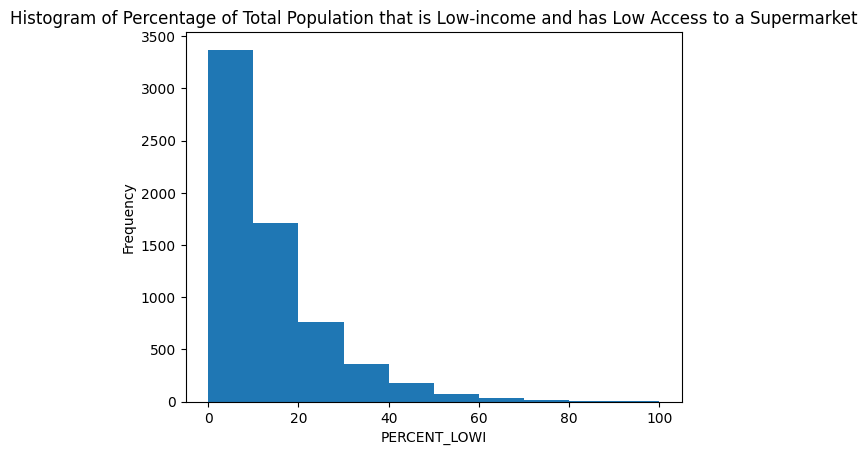

In [42]:
# Histogram
df['PERCENT_LOWI'].plot.hist()
plt.xlabel('PERCENT_LOWI')
plt.ylabel('Frequency')
plt.title('Histogram of Percentage of Total Population that is Low-income and has Low Access to a Supermarket')
plt.show()

The histogram above visualizes the distribution of the percentage of people with low access to a supermarket or large grocery store (PERCENT_LOWI) values from our DataFrame df. The x-axis represents the 'PERCENT_LOWI' values, while the y-axis represents the frequency of occurrence of those values. The histogram helps us understand the distribution of low-income and low access to a supermarket within the total population. It shows how the 'PERCENT_LOWI' values are distributed across different intervals. Then a box plot was visualised using the below code.

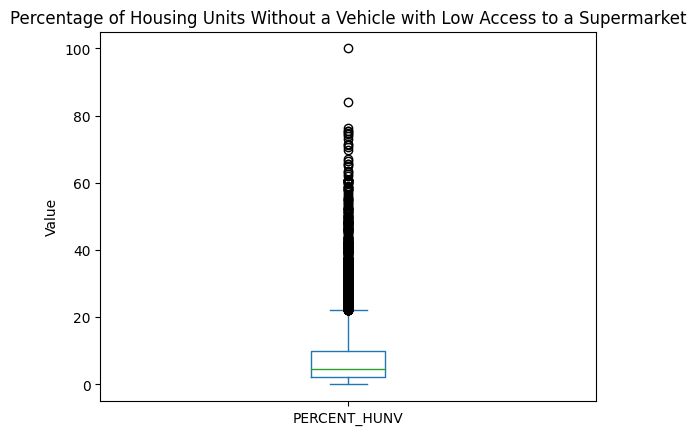

In [43]:
# Box plot
df['PERCENT_HUNV'].plot.box()
plt.ylabel('Value')
plt.title('Percentage of Housing Units Without a Vehicle with Low Access to a Supermarket')
plt.show()

The box plot above visualizes the distribution of the Percentage of housing units without a vehicle with low access to a supermarket or large grocery store (PERCENT_HUNV) values from our DataFrame df. The y-axis represents the values of 'PERCENT_HUNV'. The box in the plot represents the interquartile range (IQR), which is the range between the first quartile (Q1) and the third quartile (Q3). The line inside the box represents the median. The whiskers indicate the minimum and maximum values within 1.5 times the IQR. Any points outside this range are considered outliers and are plotted as individual points. The box plot helps us understand the distribution and spread of the 'PERCENT_HUNV' values. It provides information about the central tendency (median), spread (IQR), and potential outliers. By visualizing the data in a box plot like above we are able to identify the range of the 'PERCENT_HUNV' values, the presence of outliers, and any skewness or symmetry in the distribution.

# V Statistical Analysis

In this section we analyzed the relationships between variables, we fitted various statistical learning methods to select the best fitting models.

# a. Linear Regression
In order to determine if there is a correlation between family income and the availability of healthy food sources in a neighborhood, a simple linear regression was used to determine if  there is a positive relationship between increase in percentage  of people with low access to a supermarket or large grocery store and number of low-income people with low access to a supermarket or large grocery store. Here we specifically wanted to determine if people's low income is a contributing factor to why there are no grocery stores in some locations, we just were trying to determine whether factors such as low income are contributing to businesses shying away from building or establishing grocery stores in some places than others. According to Gomez and Gomez, (2014) for the simple linear regression analysis to be applicable, the following conditions must be hold: There is only one independent variable X affecting the dependent variable Y and the relationship between Y and X is known, or can be assumed, to be linear. In the above objective we assume linearity, presupposing a linear relationship between low income and low access to a grocery store. We imported statsmodels.api, a statsmodels library which is a popular Python package that provides a comprehensive suite of statistical models and methods for data analysis. We then ran the code below to fit the model.



In [44]:
# import statsmodels.api
import statsmodels.api as sm

# Load the data into a DataFrame
read= pd.read_excel('Statistical_Analysis_For_Data_Science/FoodDesertLocatorData2006(1).xlsx')


# Define the predictor variable (X) and the response variable (y)
X = df[['PERCENT_LOWI']]  # Replace 'predictor_variable' with the actual column name
y = df['PERCENT_LOWA_Pop']  # Replace 'response_variable' with the actual column name

# Add a constant term to the predictor variable
X = sm.add_constant(X)

# Create and fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Print the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       PERCENT_LOWA_Pop   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     5172.
Date:                Tue, 21 Nov 2023   Prob (F-statistic):               0.00
Time:                        20:28:21   Log-Likelihood:                -29780.
No. Observations:                6529   AIC:                         5.956e+04
Df Residuals:                    6527   BIC:                         5.958e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           36.5329      0.419     87.244   

From our results above the R-squared value of 0.442 indicates that approximately 44.2% of the variability in the dependent variable can be explained by the independent variable. This means that the independent variable has a moderate influence on the dependent variable. The coefficient for PERCENT_LOWI is 1.6019. This means that for every 1 unit increase in PERCENT_LOWI, we can expect a 1.6019 unit increase in PERCENT_LOWA_Pop, having all other variables constant.
The t-statistic is 71.915 and the p-value is 0.000. This indicates that the coefficient for PERCENT_LOWI is statistically significant at any reasonable significance level. The const coefficient (36.5329) represents the intercept of the regression line. It indicates the value of the dependent variable when all independent variables are set to zero. In this case, the F-statistic is 5172 and the p-value is 0.00, indicating that the model as a whole is statistically significant. The p-value is 0.000, indicating that the residuals are not normally distributed. From the results above we can conclude that increase in percentage of low-income people with low access to a supermarket or large grocery store results in increase in percentage  of people with low access to a supermarket or large grocery store.

The linear regression results were plotted and from the linear graph below we can see that increase in the independent variable (PERCENT_LOWI) results in some increase in the dependent variable (PERCENT_LOWA_Pop). The code below was run to plot the linear graph.

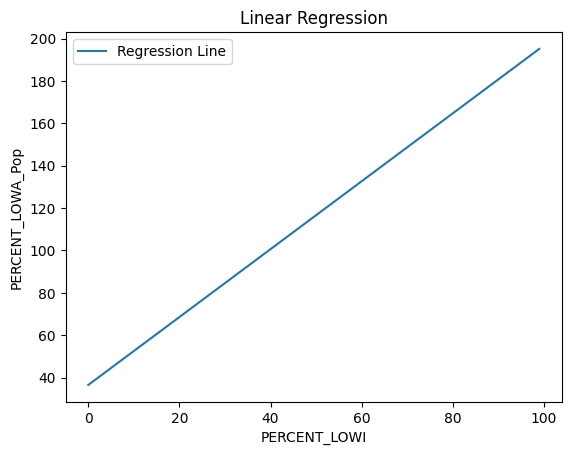

In [45]:
# Define the independent variable values
x = np.arange(0, 100, 1)

# Calculate the predicted values based on the regression equation
y = 36.5329 + 1.6019 * x

# Plot the predicted values
plt.plot(x, y, label='Regression Line')

# Add labels and title to the plot
plt.xlabel('PERCENT_LOWI')
plt.ylabel('PERCENT_LOWA_Pop')
plt.title('Linear Regression')

# Show the legend
plt.legend()

# Display the plot
plt.show()

# b.  Multiple Linear Regression

According to James et al. (2023), simple linear regression is a useful approach for predicting a response on the
basis of a single predictor variable. However, in practice we often have more
than one predictor. In the case of having more than one predictor variable the approach of fitting a separate simple linear regression model
for each predictor is not entirely satisfactory.  Instead of fitting a separate simple linear regression model for each predictor, a better approach is to extend the simple linear regression model
 so that it can directly accommodate multiple predictors. We used multuple linear regression to find answers for our second objective in this analysis. In order to answer the questions, how does the percentage of households without a vehicle with low access to a supermarket or large grocery store, the percentage of children age 0-17 with low access to a grocerly store, and the percentage of people age 65+ with low access relate to the overall percentage of people with low access to a supermarket or large grocery store we fitted the multiple linear regression model as below.

In [46]:
# Load the data into a DataFrame
read= pd.read_excel('Statistical_Analysis_For_Data_Science/FoodDesertLocatorData2006(1).xlsx')

# Define the independent variables X and dependent variable y
X = df[['PERCENT_HUNV', 'PERCENT_KIDS', 'PERCENT_SENIORS']]
y = df['PERCENT_LOWA_Pop']

# Add a constant column to the independent variables
X = sm.add_constant(X)

# Fit the multivariate regression model
model = sm.OLS(y, X).fit()

# Print the regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       PERCENT_LOWA_Pop   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     9007.
Date:                Tue, 21 Nov 2023   Prob (F-statistic):               0.00
Time:                        20:28:32   Log-Likelihood:                -26340.
No. Observations:                6529   AIC:                         5.269e+04
Df Residuals:                    6525   BIC:                         5.272e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              12.3664      0.331     

 The Ordinary Least Squares regression model is used to explain the relationship between the dependent variable, Percentage of people with low access to a supermarket or large grocery store (PERCENT_LOWA_Pop) and three independent variables: Percentage of housing units without a vehicle with low access to a supermarket (PERCENT_HUNV), Percentage of children age 0-17 with low access to a supermarket or large grocery store (PERCENT_KIDS), and Percentage of people age 65+ with low access to a supermarket or large grocery store (PERCENT_SENIORS). The R-squared value of 0.805 indicates that the independent variables collectively explain 80.5% of the variation in the dependent variable. The adjusted R-squared value is the same as the R-squared value in this case, indicating no penalties for adding more independent variables to the model. The F-statistic of 9007 indicates that the overall regression model is statistically significant. The p-value of 0.00 for the F-statistic suggests that the probability of observing such a large F-statistic by chance alone is extremely low, indicating that the regression model is highly significant. The log-likelihood value of -26340 is a measure of how well the model fits the observed data. Lower values indicate a better fit. The p-value of 0.000 suggests that the residuals are not normally distributed. Based on the coefficient estimates in the regression analysis above, there is a positive relationship between the dependent variable "PERCENT_LOWA_Pop" and the independent variables "PERCENT_HUNV", "PERCENT_KIDS", and "PERCENT_SENIORS". Below we plot the results to demonstrate the linearity.



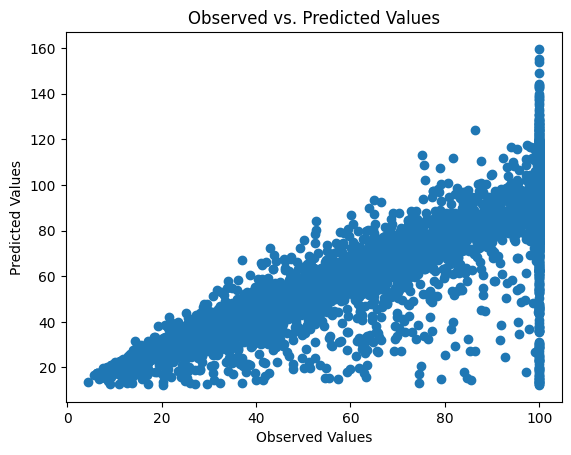

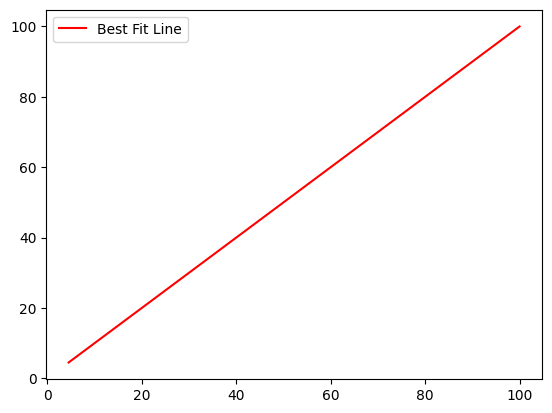

In [47]:
# Plot the observed and predicted values
plt.scatter(y, model.fittedvalues)
plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')
plt.title('Observed vs. Predicted Values')
plt.show()

# Add best fitting line
line = np.linspace(min(y), max(y), 100)
plt.plot(line, line, color='red', label='Best Fit Line')  # Line of best fit is a straight line with slope 1 and intercept 0

plt.legend()
plt.show()

The scatter plot shows the relationship between the observed values and the predicted values obtained from the regression model. The scatter plot shows individual data points, where the x-axis represents the observed values and the y-axis represents the predicted values. The scatter of points in the plot indicates the level of agreement between the observed and predicted values. In our plot above the points are close to the line of best fit, suggesting a strong agreement. The line of best fit added to the plot is a straight line with a slope of 1 and an intercept of 0. This line represents the ideal scenario where the observed and predicted values perfectly match. By visual inspection, if the points in the plot predominantly fall around or close to the line of best fit, it suggests that the regression model accurately predicts the values of the dependent variable. However, there is some spreading of points away from the line of best fit, indicating that there may be other factors influencing the relationship.

# c. K-Nearest Neighbors
Given a column of different counties and a column of percentage of low-income people with low access to a supermarket or large grocery store we can identify states or neighborhoods with the highest need for intervention and policy measures to address food accessibility issues by using KNN to cluster similar neighborhoods based on their characteristics and food accessibility levels. KNN can assist in identifying areas or neighborhoods with the highest need for intervention and policy measures to address food accessibility issues. By using KNN to cluster similar neighborhoods based on their characteristics and food accessibility levels, policymakers can prioritize resources and interventions in the areas that are most in need. To identify counties with the highest need for intervention which is the third main objective of this analysis we fit the K Nearest Neighbors (KNN) clustering based on their characteristics and food accessibility levels as below.

In [48]:
# import key libraries for the function
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# Load the data into a DataFrame
data = pd.read_excel('Statistical_Analysis_For_Data_Science/FoodDesertLocatorData2006(1).xlsx')

# Select the columns of interest
X = data[['CountyName', 'PERCENT_LOWA_Pop']]

# Encode the categorical variable 'State' using one-hot encoding
onehot_encoder = OneHotEncoder(sparse=False)
states_encoded = onehot_encoder.fit_transform(X[['CountyName']])

# Concatenate the encoded states with the numerical column 'PERCENT_LOWA_Pop'
X_encoded = np.concatenate([states_encoded, X[['PERCENT_LOWA_Pop']]], axis=1)

# Scale the data to ensure all features have equal importance
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Apply K-means clustering using the 'KMeans' algorithm
k = 3  # Number of clusters to create
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(X_scaled)

# Add the cluster labels back to the original dataset
data['Cluster'] = kmeans.labels_

# Identify the states or neighborhoods with the highest need for intervention by analyzing the cluster labels
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)  # Inverse transform the scaled cluster centers
cluster_centers_df = pd.DataFrame(cluster_centers, columns=[f"Feature_{i+1}" for i in range(cluster_centers.shape[1])])  # Create a DataFrame for cluster centers with generic column names
highest_need_cluster = cluster_centers_df.loc[cluster_centers_df['Feature_50'].idxmax()]  # Get the cluster with the highest percentage of low-income people with low access
states_highest_need = list(set(data[data['Cluster'] == highest_need_cluster.name]['CountyName'].tolist()))  # Get states/neighborhoods in the cluster

states_highest_need

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


['Clay',
 'Bienville',
 'Mower',
 'Le Flore',
 'Coffee',
 'Lewis',
 'Miller',
 'Ventura',
 'Bristol',
 'Pearl River',
 'St. Lawrence',
 'Navajo',
 'Twin Falls',
 'Randolph',
 'Hidalgo',
 'Licking',
 'Charlotte',
 'Contra Costa',
 'St. Charles',
 'Dawes',
 'Alpena',
 'Maricopa',
 'Henrico',
 'Ozark',
 'Sheridan',
 'Beltrami',
 'Plymouth',
 'Tom Green',
 'Emmet',
 'Jackson',
 'Lucas',
 'Rusk',
 'Burlington',
 'Dorchester',
 'Anne Arundel',
 'Lake of the Woods',
 'Portage',
 'Atoka',
 'Solano',
 'Morgan',
 'Cass',
 'Lafayette',
 'Hockley',
 'Berrien',
 'Telfair',
 'Mesa',
 'Ashland',
 'Morehouse',
 'Gregory',
 'La Salle',
 'Perry',
 'Atchison',
 'Alachua',
 'Gregg',
 'Maverick',
 'Haywood',
 'Duchesne',
 'Limestone',
 'Crowley',
 'Tensas',
 'Ramsey',
 'Stark',
 'Pender',
 'Lenawee',
 'Judith Basin',
 'Berkeley',
 'Wells',
 'McKenzie',
 'Taylor',
 'Dyer',
 'Corson',
 'Chelan',
 'San Bernardino',
 'Erie',
 'Chittenden',
 'McCulloch',
 'Henry',
 'Glenn',
 'Bell',
 'Palo Pinto',
 'Pima',
 'Ch

The above printed list represents the list of counties or neighborhoods that belong to the cluster with the highest need for intervention. The government should consider strong interventions to help people in these places gain more access to nutrious food sources.

# d. Other Tried Methods

Another model was tested to answer the question: How does the percentage of low-income individuals with low access to a supermarket relate to other demographic variables? A logistic regression model with the percentage of low-income individuals as the dependent variable and other demographic variables as predictors was fitted. However our dependent variable is not in the unit interval, and hence we needed to consider using a different type of regression model that is suitable for our data. For example, our dependent variable is continuous and not bounded between 0 and 1, that is why linear regression was the best option in our case.

# 3. CONCLUSION

This statistical report intended to analyse the relationship between a number of independent variables, including "PERCENT_HUNV", "PERCENT_KIDS", and "PERCENT_SENIORS", and the dependent variable "PERCENT_LOWA_Pop". Through regression analysis, a positive relationship was identified between the dependent variable and the independent variables. The coefficient estimates indicated that as the values of the independent variables increased, the value of the dependent variable also tended to increase. The scatter plot depicting the observed and predicted values demonstrated a moderate level of agreement, and a best fitting line was included to visualize the relationship further. Overall, the findings of the statistical report suggest that the independent variables have a significant positive impact on the dependent variable, providing valuable insights into the factors influencing "PERCENT_LOWA_Pop". Using the K Nearest Neighbors classification method we also were able identify neighborhoods with the highest need for intervention with informed policy measures to address food accessibility issues in these areas as places of priority.

# 4. REFERENCES

Chupilko, T. (2014) ‘Pyhton for Data Processing and Modelling Indicators of
Economic Security of the Country', Online Scientific Publishers OWN, (049), pp. 1.

Gareth, J. et al. (2023) An Introduction to Statistical Learning with Applications in Python (not known)

Pamungkas, F., Sadalia, I., and Muda, I., (2023) ‘Profit Prediction Using Multiple Linear Regression Methods Python Programming Language at PT Tri Erdnov Rezeki’, International Journal of Economic, Business, Accounting, Agriculture Management and Sharia Administration (IJEBAS), 5(3), pp. 1458. https://doi.org/10.54443/ijebas.v3i5.1076

Pamungkas, A., Sadalia, S., and Muda B., (2023) 'Application of Python in Marketing Education: A Big Data Analyticts Perspective', Marketing Education Review, 33(3), pp. 228. https://doi.org/10.1080/10528008.2021.

Stern, R. (1986) 'Statistical Procedures in Agricultural Research, By K. A. Gomez and A. A. Gomez. New York, Chichester, etc.: Wiley (1984), 2nd edition, paperback, pp. 680, price not stated.,' Experimental Agriculture, 22(3), p. 313. https://doi.org/10.1017/s0014479700014496.

